### Chapter 3 - Linear Regression

This notebook contains the data imports and my interpretation of the plots from the Chapter 3 of ISL. I also added few notes related to the theory, and few methods to ease the plotting.

<br></br>
<dl>
    <dt>Table of Content:</dt>
    <dd>[3.1 - Simple Linear Regression](#sim_lin_reg)</dd>
    <dd>&ensp;&ensp;[3.1.1 - Estimating the Coefficient](#est_coef)</dd>
    <dd>[3.2 - Multiple Linear Regression](#mult_lin_reg)</dd>
    <dd>[3.3 - Other Considerations in the Regression Model](#other_cons)</dd>
    <dd>&ensp;&ensp;[3.3.2 - Extensions of the Linear Model](#ext_lin)</dd>
    <dd>&ensp;&ensp;[3.3.3 - Potential Problems](#pot_prob)</dd>
</dl>

__Standard imports:__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

<a id='sim_lin_reg'></a>

#### 3.1 - Simple Linear Regression

In [2]:
# Loading 'Advertising' data
advertising = pd.read_csv('Data/Advertising.csv', usecols=(1, 2, 3, 4))

# Checking the import
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Single predictor variable X, and a quantative response Y
X = advertising[['TV']]
y = advertising['sales']

<a id='est_coef'></a>

#### 3.1.1 - Estimating the Coefficient

In the below code __scikit-learn__ is used to quickly estimate the intercept and coefficient.

In [4]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Instantiating the model
model = LinearRegression()

# Fitting the model and printing the values
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

7.03259354913
[ 0.04753664]


<br><br>
__FIGURE 3.1.__ For the __Advertising__ data, the least squares fit for the regression of __sales__ onto __TV__ is shown.

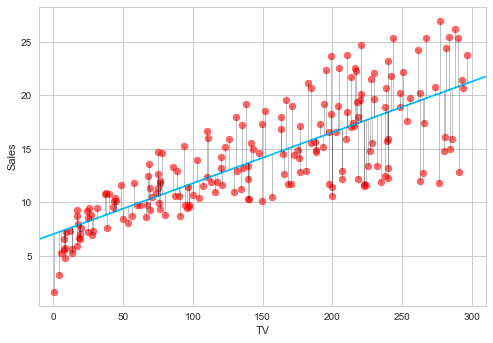

In [5]:
# Scatter plot of Sales / TV data
plt.scatter(X, y, alpha=0.6, c='r')

# Plotting the least square fit for the regression of Sales onto TV
x_line = np.arange(-10, 320, 1)
plt.plot(x_line, model.intercept_ + model.coef_[0] * x_line, c='deepskyblue')

# Predicting the values using the model
y_hat = model.intercept_ + model.coef_[0] * X['TV']

# Plotting ei - ith residual line for every i in range X
for i in np.arange(len(X)):
    plt.plot([X.iloc[i], X.iloc[i]], [y.iloc[i], y_hat.iloc[i]], c='k', alpha=0.4, lw=0.6)

# Labels and plot limits
plt.xlabel('TV')
plt.ylabel('Sales')
plt.xlim(-10, 310);

<br><br>
__TABLE 3.1.__ For the __Advertising__ data, coefficients of the least squares model for the regression of number of units sold on TV advertising budget. Using statsmodels library for the similar output.

In [6]:
# Importing the needed module
import statsmodels.formula.api as smf

# Linear model and printing the summary table
lm = smf.ols('sales~TV', data=advertising).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.47e-42
Time:                        11:51:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

__RSE (Residual standard error)__ is an estimate of the standard deviation of error. It is not provided in the __statsmodels__ table. Below equation calculates the RSE.

\begin{equation*}
RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^{n} \Bigl(y_i - f(x_i) \Bigr)}
\end{equation*}

if the predictions obtained by model ($\hat{y}$) are very close to the true outcome values, then RSE will be small, concluding that the model fits the data very well. 

In [7]:
# Calculating RSS
ssRes = np.sum((y - y_hat)**2)

# Calculating RSE
rse = np.sqrt(ssRes / (len(y) - 2))

# Printing RSE
print('Residual standard error: {:.2f}'.format(rse))

Residual standard error: 3.26


__R-squared (coefficient of determination)__ measures how well the observed values of the response variables are predicted by the model. For a linear model the values are in the range of 0 to 1. The value close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. The value of 1 indicates that the regression line perfectly fits the data.

\begin{equation*}
R^2 = 1 - \frac {SS_{res}}{SS_{tot}}
\end{equation*}

<a id='mult_lin_reg'></a>

#### 3.2 - Multiple Linear Regression

In [8]:
# Multiple predictors variable X, and a quantative response Y
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

# Fitting the model and printing the coefficients
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


<br><br>
__TABLE 3.4.__ Multiple linear regression information on __Advertising__ data.

In [9]:
# Multiple linear regression model, and printing the summary table
lm = smf.ols('sales ~ TV + radio + newspaper', data=advertising).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.58e-96
Time:                        11:51:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

<br><br>
__TABLE 3.5.__ Correlation matrix for __TV, radio, newspaper,__ and __sales__ for the __Advertising__ data.

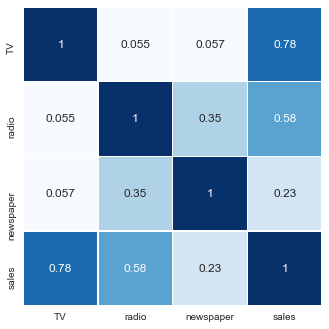

In [10]:
# Computing pairwise correlation of columns, using pandas corr() function, and assigning to a variable
corr = advertising.corr()

# Using seaborn's heatmap function for the correlation matrix
sns.heatmap(corr, square=True, annot=True, cbar=False, cmap='Blues', linewidths=0.5);

<a id='other_cons'></a>

#### 3.3 - Other Considerations in the Regression Model

In [11]:
# Loading 'Credit' data
credit = pd.read_csv('Data/Credit.csv', usecols=list(np.arange(1, 12)))
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


<br><br>
__FIGURE 3.6.__ The __Credit__ data set contains information about __balance, age, cards, education, income, limit,__ and __rating__ for a number of potential customers.

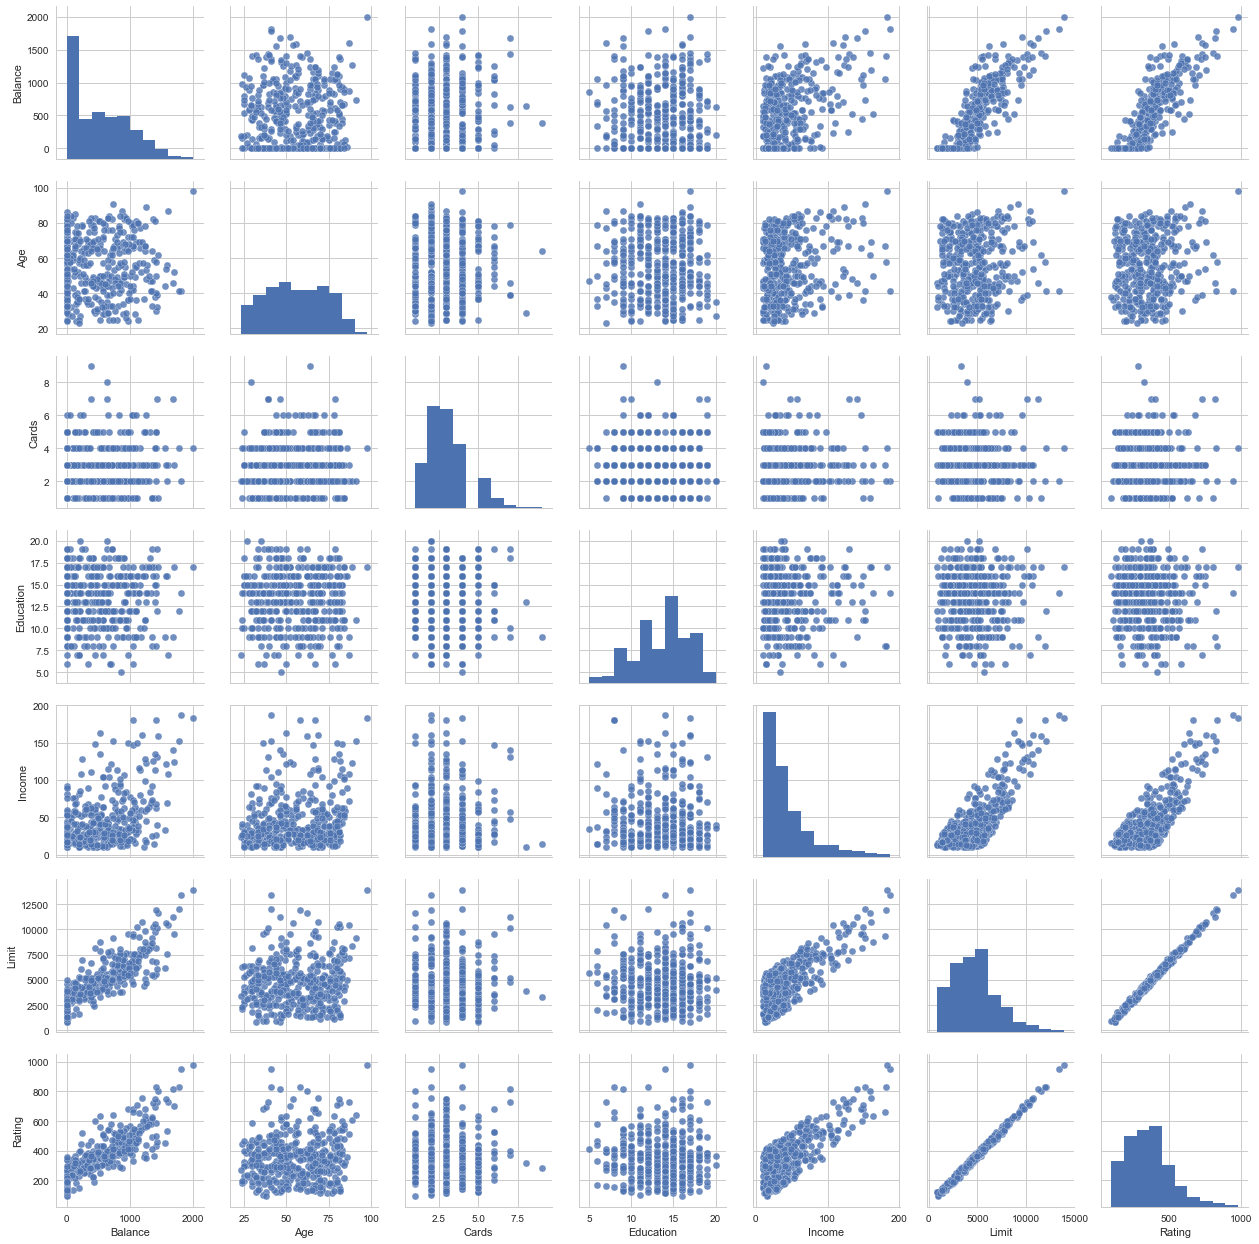

In [12]:
# Using seaborn's pairplot function
sns.pairplot(credit[['Balance', 'Age', 'Cards', 'Education', 'Income', 'Limit', 'Rating']],
            plot_kws=dict(alpha=0.8));

<br><br>
__TABLE 3.7.__ Least squares coefficient estimates associated with the regression of __balance__ onto __gender__ in the __Credit__ data set.

In [13]:
est = smf.ols('Balance~Gender', credit).fit()
print(est.summary().tables[1])

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267


<br><br>
__TABLE 3.8.__ Least squares coefficient estimates associated with the regression of __balance__ onto __ethnicity__ in the __Credit__ data set.

In [14]:
est = smf.ols('Balance~Ethnicity', credit).fit()
print(est.summary().tables[1])

                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930


<a id='ext_lin'></a>

#### 3.3.2 - Extensions of the Linear Model

__TABLE 3.9.__ For the __Advertising__ data, least squares coefficient estimates associated with the regression of sales onto __TV__ and __radio__, with an interaction term.

In [15]:
lm = smf.ols('sales ~ TV + radio + (TV * radio)', data=advertising).fit()
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


<a id='non_lin'></a>
#### Non-linear realationship

Now we are going to look at the __Auto.csv__ data set. The data set has missing horsepower values, indicated by '?'. Also the values are in the string format. The code shown below imports the data, removes the rows containing '?', and transforms the type to __int__.

In [16]:
auto = pd.read_csv('Data/Auto.csv')
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<br><br>
__FIGURE 3.8.__ The __Auto__ data set. The linear regression fit, second-degree polynomials fit, and fifth-degree polynomilas fit.

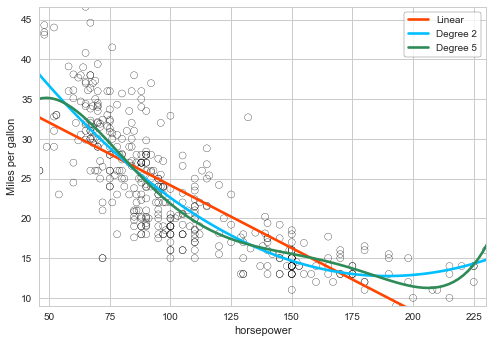

In [17]:
plt.scatter(auto['horsepower'], auto['mpg'], facecolors='None', edgecolors='k', label=None)
sns.regplot(auto['horsepower'], auto['mpg'], ci=None, color='orangered', label='Linear', scatter=False)
sns.regplot(auto['horsepower'], auto['mpg'], ci=None, color='deepskyblue', label='Degree 2', order=2, scatter=False)
sns.regplot(auto['horsepower'], auto['mpg'], ci=None, color='seagreen', label='Degree 5', order=5, scatter=False)

plt.ylabel('Miles per gallon')
plt.xlim(np.min(auto['horsepower']), np.max(auto['horsepower']))
plt.ylim(np.min(auto['mpg']), np.max(auto['mpg']))

# Adding the legend
custom_legend = plt.legend(frameon=True)
custom_legend.get_frame().set_edgecolor('k');

<br><br>
__TABLE 3.10.__ Least squares coeffiecient estimates associated with the regression of __mpg__ onto __horsepower__ and __horsepower2__.

In [18]:
lm_auto_poly = smf.ols('mpg~horsepower + I(horsepower ** 2.0)', data=auto).fit()
print(lm_auto_poly.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               56.9001      1.800     31.604      0.000      53.360      60.440
horsepower              -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2.0)     0.0012      0.000     10.080      0.000       0.001       0.001


<a id='pot_prob'></a>

#### 3.3.3 - Potential Problems

There is a great article on [Medium](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034), by Emre Can, recreating the R plots in Python. Below codes are slight modifications of the tutorial.

__R__ produces 4 different plots:
* __Residuals vs. Fitted plot__:

__Fitted__ - the prediction of X values with the slope and intercept of the model.

__Residual__ - the difference between the actual value and the predicted by the model.

In [19]:
def res_vs_fit(x, y):
    sns.residplot(x, y, lowess=True, scatter_kws={'alpha': 0.8}, 
                  line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
    
    plt.xlabel('Fitted')
    plt.ylabel('Residuals');

* __Normal Q-Q plot__:

Normal Q-Q (quantile-quantile) plot shows if the data came from a theoretical distribution such as a Normal or exponential. If the line formed by the scatterplot is roughly straight then both sets of quantiles come from Normal distributions ([Detailed explanation](http://data.library.virginia.edu/understanding-q-q-plots/)).

In [20]:
def qq_plot(x):
    from statsmodels.graphics.gofplots import ProbPlot
    QQ = ProbPlot(x)
    QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plt.ylabel('Standardized Residuals');

* __Scale-Location plot__:

Scale-Location plot shows if residuals are spread equally along the ranges of predictors.

In [21]:
def scale_location(x, y):
    plt.scatter(x, y, alpha=0.8)
    sns.regplot(x, y, scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
    
    plt.xlabel('Fitted')
    plt.ylabel('Sq-rt Standardized Residuals');

* __Residual vs. Leverage__:

This plot shows if any outliers have influence over the regression fit. The outliers can dramatically impact the model when the cases are outside of the Cook's distance.

In [22]:
def leverage_vs_res_std(x, y):
    plt.scatter(x, y, alpha=0.8, label=None)
    sns.regplot(x, y, scatter=False, ci=False, lowess=True,
                line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})

    plt.xlim(np.min(x), np.max(x))
    plt.ylim(np.min(y), np.max(y))
    plt.xlabel('Leverage')
    plt.ylabel('Standardized Residuals')

    # shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm.params) # number of model parameters

    graph(lambda t: np.sqrt((0.5 * p * (1 - t)) / t), 
          np.linspace(0.001, 0.200, 50), 
          'Cook\'s distance') # 0.5 line

    graph(lambda t: np.sqrt((1 * p * (1 - t)) / t), 
          np.linspace(0.001, 0.200, 50)) # 1 line

    plt.legend(loc='upper right');

I am using __scikit-learn__ for the regession fit in the following examples (first for the linear regression, and second for the second-degree polynomials).

In [23]:
# Instantiating the linear regression (from scikit-learn) and fitting the data
lr_auto = LinearRegression()

X = auto[['horsepower']]
y = auto['mpg']

lr_auto.fit(X, y)

# Defining variables for the Residuals vs. Fitted plot
fitted = lr_auto.predict(X)
residuals = y - fitted

In [24]:
# Instantiating PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias = False)

# Transforming X to second-degree polynomial
X_poly = poly.fit_transform(X)

# Fitting the model with transformed X
lr_auto_poly = LinearRegression()
lr_auto_poly.fit(X_poly, y)

# Defining variables for the Residuals vs. Fitted plot
fitted_poly = lr_auto_poly.predict(X_poly)
residuals_poly = y - fitted_poly

<br><br>
__FIGURE 3.9.__ Plots of residuals vs. fitted values for the __Auto__ data set. Left plot shows a non-linearity in the data. Right plot shows that quadratic term improves the fit to the data (little pattern in the residuals).

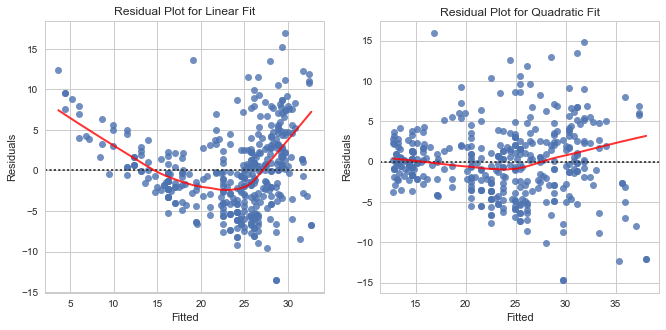

In [25]:
plt.figure(figsize=(11, 5))

# Left plot
plt.subplot(1, 2, 1)
plt.title('Residual Plot for Linear Fit')
res_vs_fit(fitted, residuals)

# Right plot
plt.subplot(1, 2, 2)
plt.title('Residual Plot for Quadratic Fit')
res_vs_fit(fitted_poly, residuals_poly)